In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


## importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## loading the data

In [3]:
df=pd.read_csv('/kaggle/input/test-file/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## dropping the unnecessary columns

In [5]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


## checking the null value

In [7]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

## imputing or filling the null values using average

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
df[['Age','Fare']]=imputer.fit_transform(df[['Age','Fare']])

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## label encoding 

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])

## one hot encoding

In [12]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,34.5,0,0,7.8292,True,False
1,1,3,0,47.0,1,0,7.0000,False,True
2,0,2,1,62.0,0,0,9.6875,True,False
3,0,3,1,27.0,0,0,8.6625,False,True
4,1,3,0,22.0,1,1,12.2875,False,True


## label encoding into the embarked column

In [14]:
df_encoded['Embarked_Q']=label_encoder.fit_transform(df_encoded['Embarked_Q'])
df_encoded['Embarked_S']=label_encoder.fit_transform(df_encoded['Embarked_S'])


In [15]:
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,34.5,0,0,7.8292,1,0
1,1,3,0,47.0,1,0,7.0000,0,1
2,0,2,1,62.0,0,0,9.6875,1,0
3,0,3,1,27.0,0,0,8.6625,0,1
4,1,3,0,22.0,1,1,12.2875,0,1


## countplot

<Axes: xlabel='Sex', ylabel='count'>

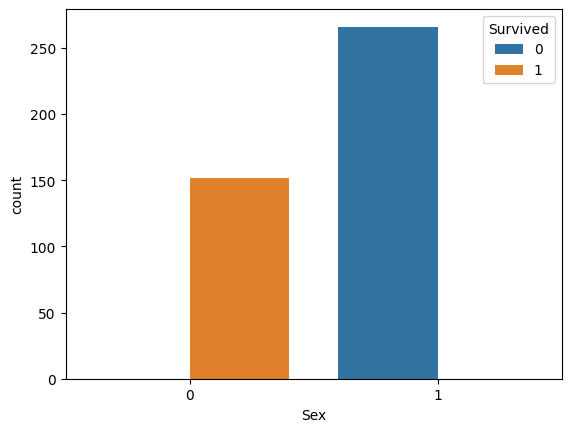

In [37]:
sns.countplot(x=df_encoded['Sex'],hue=df_encoded['Survived'])

## separating the data columns for training the model into independent variable x and dependent variable y

In [25]:
x=df_encoded.drop(columns=['Survived'],axis=1)
y=df_encoded['Survived']


## splitting the data into 70% training data and 30% testing data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## importing the logistic regression model and fitting the model

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## model prediction

In [28]:
y_pred=model.predict(x_test)

## accuracy

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

## scatterplot

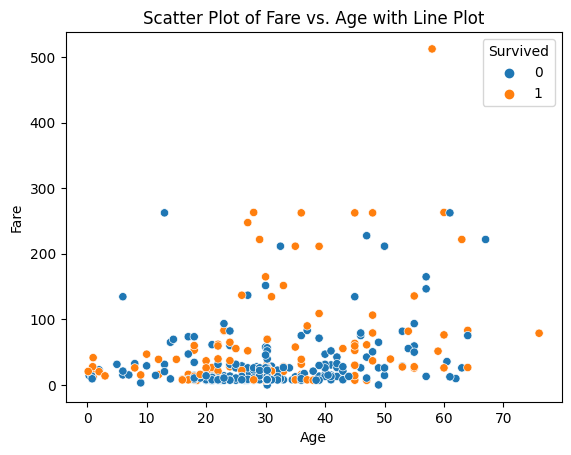

In [35]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs. Age with Line Plot')
plt.show()